# Note

Please go to the binary.py in /Analysis, go to the line 193 and 200, change 'directory/to/POLARIS/' into the directory to POLARIS in your computer.

# 

In [9]:
import binary as b
import fits_file as ff
import os
import numpy as np
import matplotlib.pyplot as plt

directory = '/directory/to/POLARIS/testing/alignment_RATs'

## To read the binary file

In [2]:
fname = os.path.join(directory, 'grid_rat.dat')
data = b.binary_file(fname)
parameter, matrix = data.read_binary_grid_file()

### Parameter inside the binary file

In [32]:
parameter.keys()

dict_keys(['parameter_size_cell', 'Rmin', 'Rmax', 'Nr', 'Nph', 'Nth', 'fr', 'fph', 'fth', 'T_d_a', 'abs_ini', 'urad', 'ux', 'uy', 'uz', 'm_H', 'T_d', 'B_x', 'B_y', 'B_z', 'a_align', 'a_min_aJ_lowJ', 'a_max_aJ_lowJ', 'a_min_aJ_highJ', 'a_max_aJ_highJ', 'a_min_JB_DG_50', 'a_max_JB_DG_50', 'a_min_JB_DG_100', 'a_max_JB_DG_100', 'a_max_JB_Lar', 'akrat_lowJ', 'akrat_highJ', 'gamma', 'cos(psi)', 'U'])

### Shape of datacube

In this matrix, the first dimension shows the values along the radial direction, second dimension is along the azimuthal direction, third dimension is along the polar direction, and fourth dimension is the index of data in the binary file

In [33]:
matrix.shape

(250, 1, 201, 740)

### Variation of the mean dust temperature with distances

Text(0, 0.5, '$\\sf{\\rm T_{\\rm d} (K)}$')

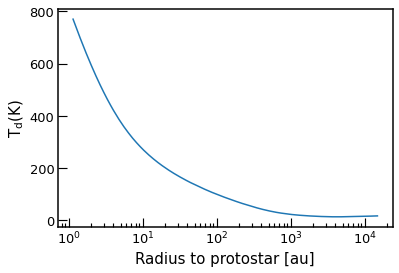

In [5]:
# position of each cell along the radial direction
r = data.radial_list(parameter)

# 3D distribution dust temperature
Td = matrix[:, :, :, parameter['T_d']]

# Mean dust temperature along the radial direction
Td = np.sum(Td, axis = 2)/parameter['Nth']
 
fig, ax = plt.subplots()
ff.configure_figure(ax)
ax.plot(r, Td, label = r'$\sf{\rm T_{\rm d} (K)}$')
ax.set_xscale('log')
ax.set_xlabel('Radius to protostar [au]', fontsize = 15)
ax.set_ylabel(r'$\sf{\rm T_{\rm d} (K)}$', fontsize = 15)

### Variation of the mean radiation field strength and an anisotropic degree with distances

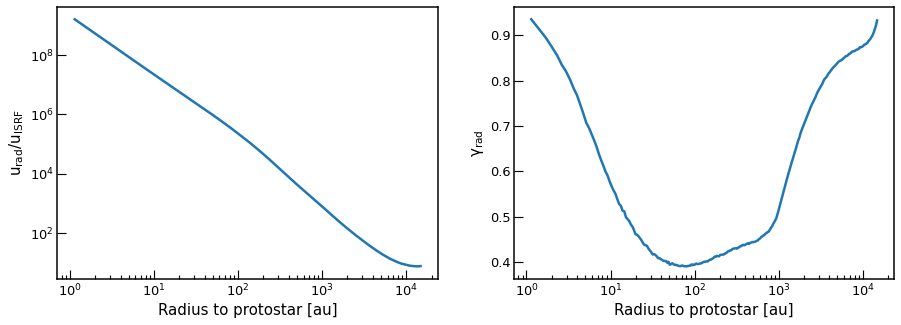

In [6]:
# 3D radiation field strength U = urad/uISRF
U = parameter['U']
# Average U along the radial direction
U = np.sum(U, axis = 2)/parameter['Nth']

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(r, U, linewidth = 2.5, linestyle = '-') 
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('Radius to protostar [au]', fontsize = 15)
ax[0].set_ylabel(r'$\sf{\rm u_{\rm rad}/u_{\rm ISRF}}$', fontsize = 15)
ff.configure_figure(ax[0])

#-----------------------------------------------------------
# 3D distribution of an anisotropic degree gamma_rad
gamma = matrix[:, :, :, parameter['gamma']]
# Average gamma_rad along the radial direction
gamma = np.sum(gamma, axis = 2)/parameter['Nth']

ax[1].plot(r, gamma, linewidth = 2.5, linestyle = '-')
ax[1].set_xscale('log')
ax[1].set_xlabel('Radius to protostar [au]', fontsize = 15)
ax[1].set_ylabel(r'$\sf{\rm \gamma_{\rm rad}}$', fontsize = 15)
ff.configure_figure(ax[1])

### Grain aligment size

Text(0, 0.5, '$\\sf{\\rm grain ~ size [\\mu m]}$')

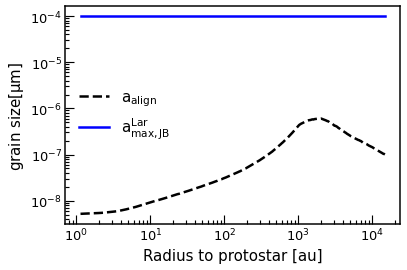

In [8]:
# 3D distribution of the minimum grain alignment size
align = matrix[:, :, :, parameter['a_align']]
# Average values of align alog the radial direction
align = np.sum(align, axis = 2)/parameter['Nth']

# 3D distribution of the maximum rain alignment size defined by the Larmor precession condition
amax_JB_Lar = matrix[:, :, :, parameter['a_max_JB_Lar']]
# Average values of amax_JB_Lar alog the radial direction
amax_JB_Lar = np.sum(amax_JB_Lar, axis = 2)/parameter['Nth']

fig, ax = plt.subplots()
ax.plot(r, align, color = 'black', linewidth = 2.5, linestyle = '--', label = r'$\sf{\rm a_{\rm align}}$')
ax.plot(r, amax_JB_Lar, color = 'blue', linewidth = 2.5, label = r'$\sf{\rm a_{\rm max,JB}^{\rm Lar}}$')
ax.set_xscale('log')
ax.set_yscale('log')
ff.configure_figure(ax)
ax.legend(frameon = False, fontsize = 15)
ax.set_xlabel('Radius to protostar [au]', fontsize = 15)
ax.set_ylabel(r'$\sf{\rm grain ~ size [\mu m]}$', fontsize = 15)